# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

In addition to implementing code, there is a brief writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) that can be used to guide the writing process. Completing both the code in the Ipython notebook and the writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/322/view) for this project.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, consult the forums for more troubleshooting tips.**  

## Import Packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from glob import glob
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


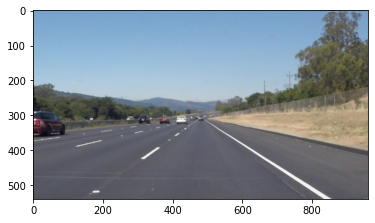

In [3]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

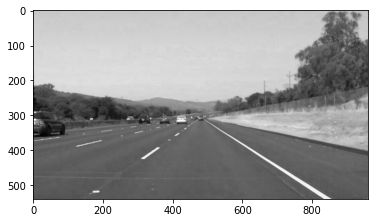

In [4]:
# RGB to hsv 
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2HSV)[:, :, 2], cmap="gray")


## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images  
`cv2.cvtColor()` to grayscale or change color  
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [5]:
import os
os.listdir("test_images/")

['solidWhiteCurve.jpg',
 'whiteCarLaneSwitch.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidWhiteRight.jpg',
 'solidYellowLeft.jpg']

## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

testing some components !

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images  
`cv2.cvtColor()` to grayscale or change color  
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image


In [6]:
test_images =  list(glob('test_images/*.jpg'))
print(test_images)

['test_images/solidWhiteCurve.jpg', 'test_images/whiteCarLaneSwitch.jpg', 'test_images/solidYellowCurve.jpg', 'test_images/solidYellowCurve2.jpg', 'test_images/solidWhiteRight.jpg', 'test_images/solidYellowLeft.jpg']


In [7]:
from lane_detection.utils import horizon_crop, grayscale, canny, gaussian_blur
    

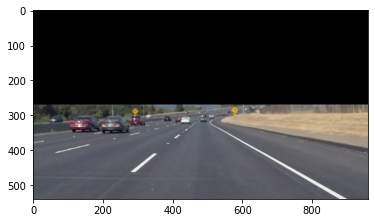

In [8]:
# A small test that it works with color
plt.imshow(horizon_crop(mpimg.imread(test_images[0])))

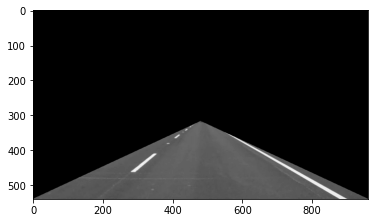

In [9]:
from lane_detection.utils import interest_region_crop
plt.imshow(interest_region_crop(horizon_crop(grayscale(mpimg.imread(test_images[0])))), cmap='gray')

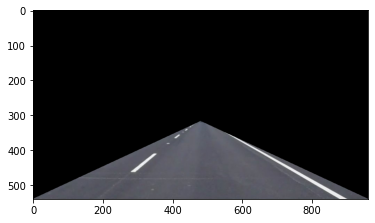

In [10]:
# and with color
plt.imshow(interest_region_crop(horizon_crop(mpimg.imread(test_images[0])))) # it works too !

True

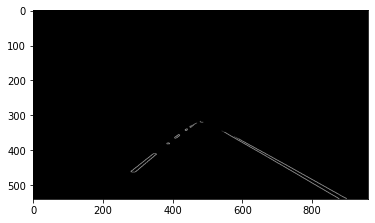

In [11]:
interest_edges = interest_region_crop(horizon_crop(canny(gaussian_blur(grayscale(mpimg.imread(test_images[0]))))))
plt.imshow(interest_edges, cmap='gray')
cv2.imwrite('./examples/interest_edges.jpg', interest_edges)

## Merging detected Segment 

The merging algorithm is based on a agglomerative approach whith configurable distance and similartiy threshold between semgments (default cosine similarity). To merge two segment the shortest one end are projected into the longest one then the longest configuration is keps as a resulted segment in the following cells (this section will demonstrate the merging/projecting feature of the implmented Segment class). Later this features will be integrated in an agglomertive algorithm which recursively agglomerate the best segments to merge (till a threshold of similarity is reached). The bottom of the image then will be projected into the detected segments for completeness. Also a horizon is 

see utils.py and segment.py for implementation details


In [12]:
# Extract the segments with Hough (lines) on the edges image
from lane_detection.segment import to_segments
from lane_detection.hough_lines import HoughLines

edges_image = interest_region_crop(horizon_crop(canny(gaussian_blur(grayscale(mpimg.imread(test_images[0]))))))
detected_segments = to_segments(np.squeeze(HoughLines()(edges_image))) # Transform the Hough Lines output into Segments (see: Segment class)
segments_sample = detected_segments[-5:] # get a small sample of segment (only for testing)
segments_sample

[(684, 419) -> (832, 501),
 (853, 513) -> (896, 537),
 (541, 345) -> (877, 538),
 (571, 361) -> (786, 485),
 (835, 515) -> (876, 539)]

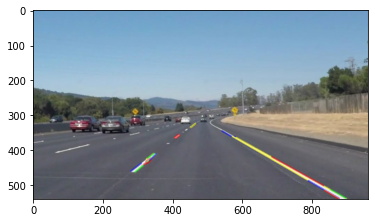

In [13]:
# Visualize detected segments
from lane_detection.visu_utils import visualize_segments
palette = [(255,0,0), (0,255,0), (0,0,255), (255,255,0)] # a colors palette (to use with rotating index)
detected_segments_image = visualize_segments( [ ([segment],  palette[index%len(palette)]) for index, segment in enumerate(detected_segments)], test_images[0])
plt.imsave("./examples/detected_segments.jpg", detected_segments_image)

In [14]:
segments_sample

[(684, 419) -> (832, 501),
 (853, 513) -> (896, 537),
 (541, 345) -> (877, 538),
 (571, 361) -> (786, 485),
 (835, 515) -> (876, 539)]

In [15]:
segments_sample[0]

(684, 419) -> (832, 501)

In [16]:
segments_sample[0].sim(segments_sample[1])

0.9999945551653019

In [17]:
# A test of merging/extending and Segment cluster similarity
# TO reactivate after updating the merge code
# assert segments_sample[4].merge(segments_sample[3]).sim(segments_sample[3].merge(segments_sample[4]))  == 1

## Testing Segment extension/merging features

### Point/Segment features

In [18]:
# Testing projection/extension
from lane_detection import Point, Segment

ss = segments_sample[4]
ref = Point(400, 200) # a test point to project on the segment `ss`
projected = ss.project(ref)
projection = Segment((ref.x, ref.y, projected.x, projected.y))
print(projection)

(400, 200) -> (373, 244)


In [19]:
# Visualizing results
# to sort-out/remove redundant visualization 
from lane_detection.visu_utils import visualize_segments

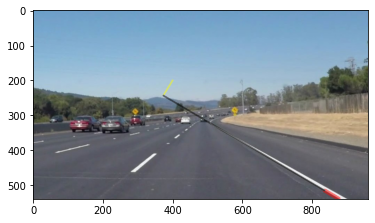

In [20]:

extension = Segment((ss.x1, ss.y1, projected.x, projected.y))
segment_extension_image = visualize_segments([([ss], [255, 0, 0]), # original segment in red
                    ([projection], [255, 255, 0]), # ref/test point ortho. projection on the red segment
                    ([extension], [0, 0, 0]), # resulted extension
                  ], test_images[0])
plt.imsave("./examples/segment_extension.jpg", segment_extension_image)

    
  

In [21]:
Segment((0, 0, 1, 1)).equation

(-1.0, 1, 0.0)

In [22]:
Segment((0, 0, 1, 1)).intersection(Segment((3, 0, 2, 2)))

Point(x=2, y=2)

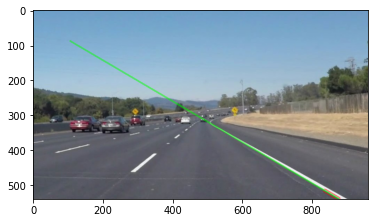

In [23]:
_ = visualize_segments([([ss], [255, 0, 0]), ([ss.point_extend(Point(200, 400)).point_extend(Point(100, 100))], [0, 255, 0])], test_images[0])

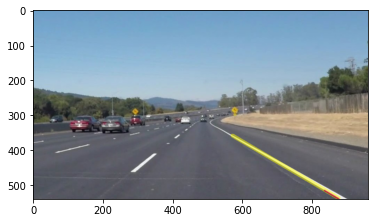

In [24]:
_ = visualize_segments([([segments_sample[4].merge(segments_sample[3])], [255, 255, 0]), ([segments_sample[4]], [255, 0, 0])], test_images[0])

### SegmentCluster (Mergeable)

In [25]:
from lane_detection.clustering import Mergeable, SegmentCluster, agglomerate
from pprint import pprint

# Defining Segment clusters (where compute merge the cluster into a segment)
# as described before extending the longest segment through the projection of the ends of the smaller one

cache = {} # A cache of computed merge as Segments (identified by the tuple given as the first parameter)
s1 =SegmentCluster((3, 4), segments_sample).compute(cache=cache, update=True)
print('call 1 ->', cache) # the merged Segment should be part of the new cache (as update=True)



# Buidling more cluster using/populating the same cache `cache`
s2 = SegmentCluster((4, 3), segments_sample).compute(cache=cache, update=True)
s3 = SegmentCluster((4, 3, 2), segments_sample).compute(cache=cache, update=True)
print('Cache status with merged s2 and s3 ->', cache) # a cache containing all Segments resulted from the merge steps


# As the semgnet merging (compute is sysmetric) since it identifies the longer-smaller segment
# to reactivate after symmetrize the merging of segments 
# assert cache[(3,4)] == cache[(4, 3)] # euality check



call 1 -> {(3, 4): (571, 358) -> (876, 537)}
Cache status with merged s2 and s3 -> {(3, 4): (571, 358) -> (876, 537), (4, 3): (571, 358) -> (876, 537), (4, 3, 2): (541, 342) -> (876, 537)}


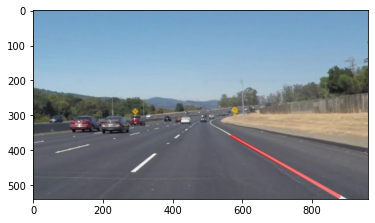

In [26]:
# Visutalize meging Merging all the segments sample together (to remove as it is redundant)
_ = visualize_segments([([SegmentCluster(tuple(range(len(segments_sample))), segments_sample).compute()], [255, 0, 0])], test_images[0]) 

### Agglomerate segments (test on the segments sample )

In [27]:
sample_clusters_dict, sample_segments_cache = agglomerate(segments_sample, threshold=0.99, similarity="cosine")
print(f"Agglomeration config -> {sample_clusters_dict}\n")
print(f"Cache dict -> {sample_segments_cache} \n")

# Remark that the sample chosen is highly similar (selected to be part of only one side of lane)
# As result the recursive agglomeration resulted in on cluster containing all the 

Agglomeration config -> {(2,): [], (4, 3): (1.0239197336314743, (2,), 0.9766390539748272)[(1.0430745433181896, (1,), 0.9587042521609602)], (0, 1): (1.0482029111532722, (4, 3), 0.9540137595112786)[(1.0559141173343811, (2,), 0.9470467186521434)]}

Cache dict -> {(0,): (684, 419) -> (832, 501), (1,): (853, 513) -> (896, 537), (2,): (541, 345) -> (877, 538), (3,): (571, 361) -> (786, 485), (4,): (835, 515) -> (876, 539), (4, 3): (571, 358) -> (876, 537), (0, 1): (684, 417) -> (896, 536)} 

/home/wo/Dropbox/udacity/self_driving_engineer_nd/CarND-LaneLines-P1/lane_detection/segment.py:121: RuntimeWarning: invalid value encountered in true_divide
  return np.dot(self.vect, other.vect) / (self.norm * other.norm)


### Agglomerative clustering on (all) detected segments with (several threshold values)

In [28]:
colors = [(255,0,0), (0,255,0), (0,0,255), (255,255,0)] # a colors palette (to use with rotating index)

def visualize_clusters_merge(clusters_dict, segments_cache, image, palette=colors):
    """ A helper to visulize/render segments merging result """
    # Extract and sort merged segments
    merged_segments = sorted(filter(lambda segment: segment is not None, [segments_cache.get(key, None) for key in clusters_dict]), key=lambda segment: segment.length, reverse=True)
    visualize_segments( [ ([segment],  palette[index%len(palette)]) for index, segment in enumerate(merged_segments)], image)

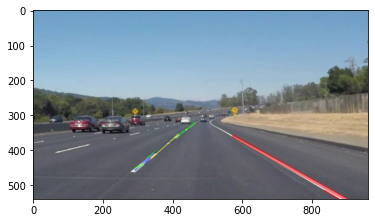

In [29]:
clusters_dict, merged_segment_cache = agglomerate(detected_segments, threshold=0.9)
visualize_clusters_merge(clusters_dict, merged_segment_cache, test_images[0])

Text(0.5, 1.0, 'Lines/Segments slopes histogram')

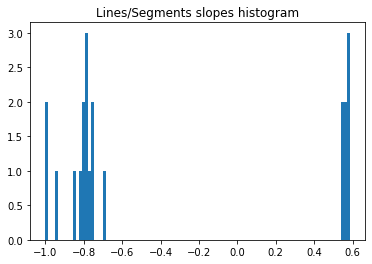

In [30]:
# Slopes distribution
slopes_data = [segment.slope for segment in filter(lambda s: not s.horizontal , detected_segments)]
plt.hist(slopes_data, bins=100)
plt.title("Lines/Segments slopes histogram")

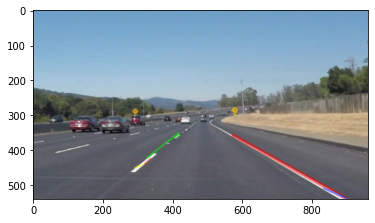

In [31]:
clusters_dict, merged_segment_cache = agglomerate(detected_segments, similarity="slope", threshold=0.95)
visualize_clusters_merge(clusters_dict, merged_segment_cache, test_images[0])


In [32]:
from lane_detection.utils import find_lane, hsv_value
lanes = { image_path: find_lane(mpimg.imread(image_path)) for image_path in test_images }
lanes

{'test_images/solidWhiteCurve.jpg': {'left': (186, 539) -> (480, 308),
  'right': (479, 308) -> (889, 538)},
 'test_images/whiteCarLaneSwitch.jpg': {'left': (174, 539) -> (474, 317),
  'right': (473, 316) -> (879, 538)},
 'test_images/solidYellowCurve.jpg': {'left': (155, 539) -> (478, 313),
  'right': (478, 312) -> (857, 538)},
 'test_images/solidYellowCurve2.jpg': {'left': (168, 539) -> (473, 312),
  'right': (472, 312) -> (860, 538)},
 'test_images/solidWhiteRight.jpg': {'left': (138, 539) -> (485, 309),
  'right': (485, 308) -> (839, 538)},
 'test_images/solidYellowLeft.jpg': {'left': (140, 539) -> (473, 311),
  'right': (472, 311) -> (854, 538)}}

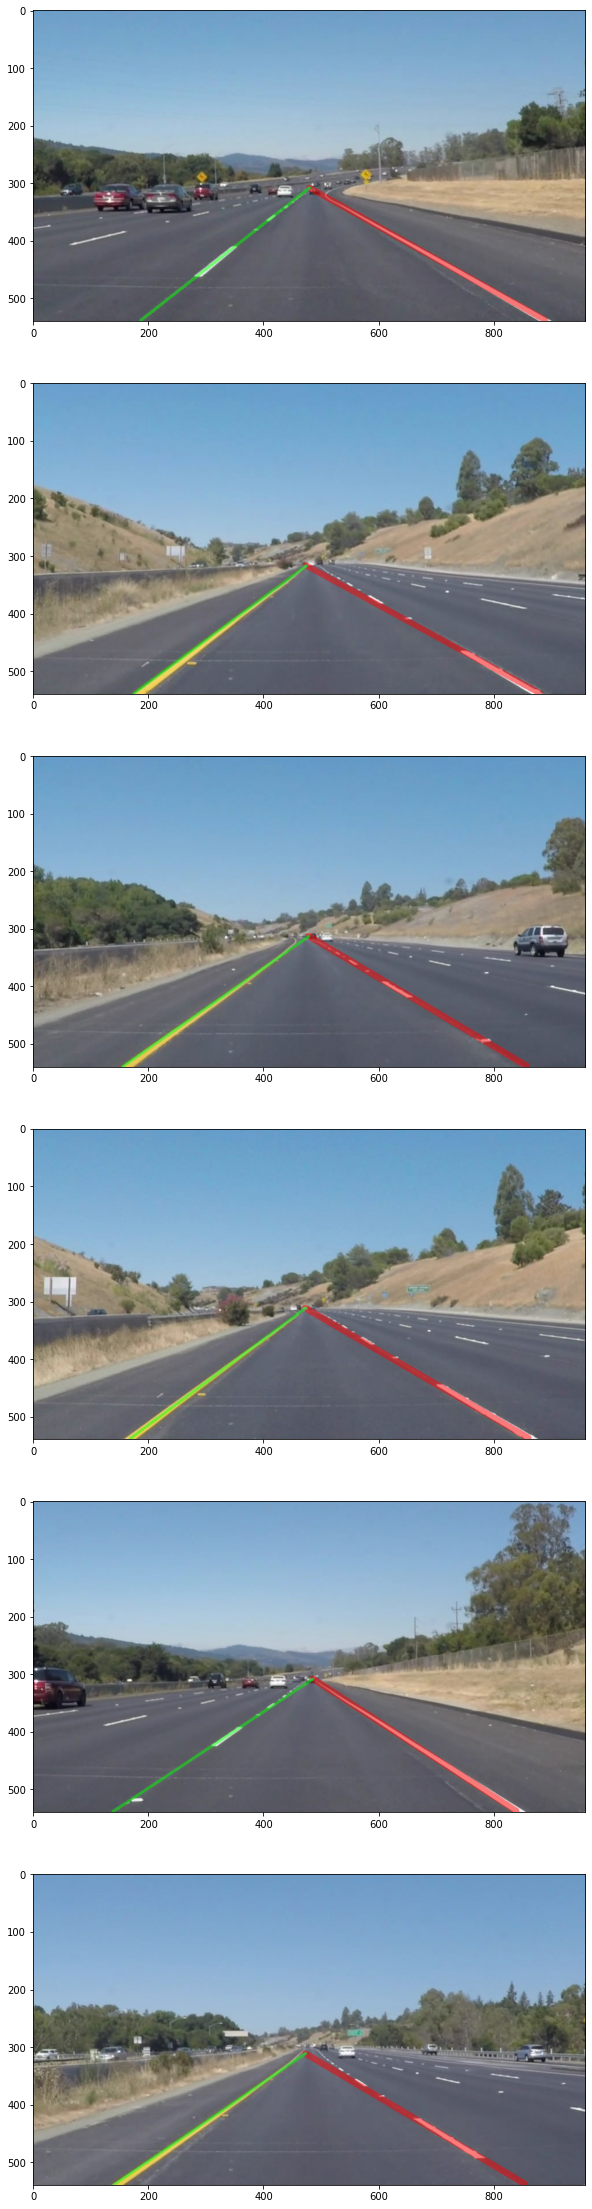

In [33]:
subplot_index = 1
plt.figure(figsize=(20,  40))
for image_path, lane_segments in  lanes.items():
    output = plt.subplot(len(lanes), 1, subplot_index)
    visualize_segments([([segment],  colors[index%len(colors)]) for index, segment in enumerate([lane_segments.get(side, None) for side in ["right", "left"]])], image_path, output)
    subplot_index += 1

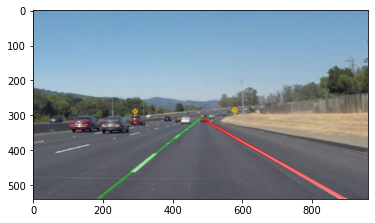

In [34]:

lane_image = visualize_segments([([segment],  colors[index%len(colors)]) for index, segment in enumerate([lanes[test_images[0]].get(side, None) for side in ["right", "left"]])], test_images[0])
plt.imsave("./examples/detected_lane.jpg", lane_image)

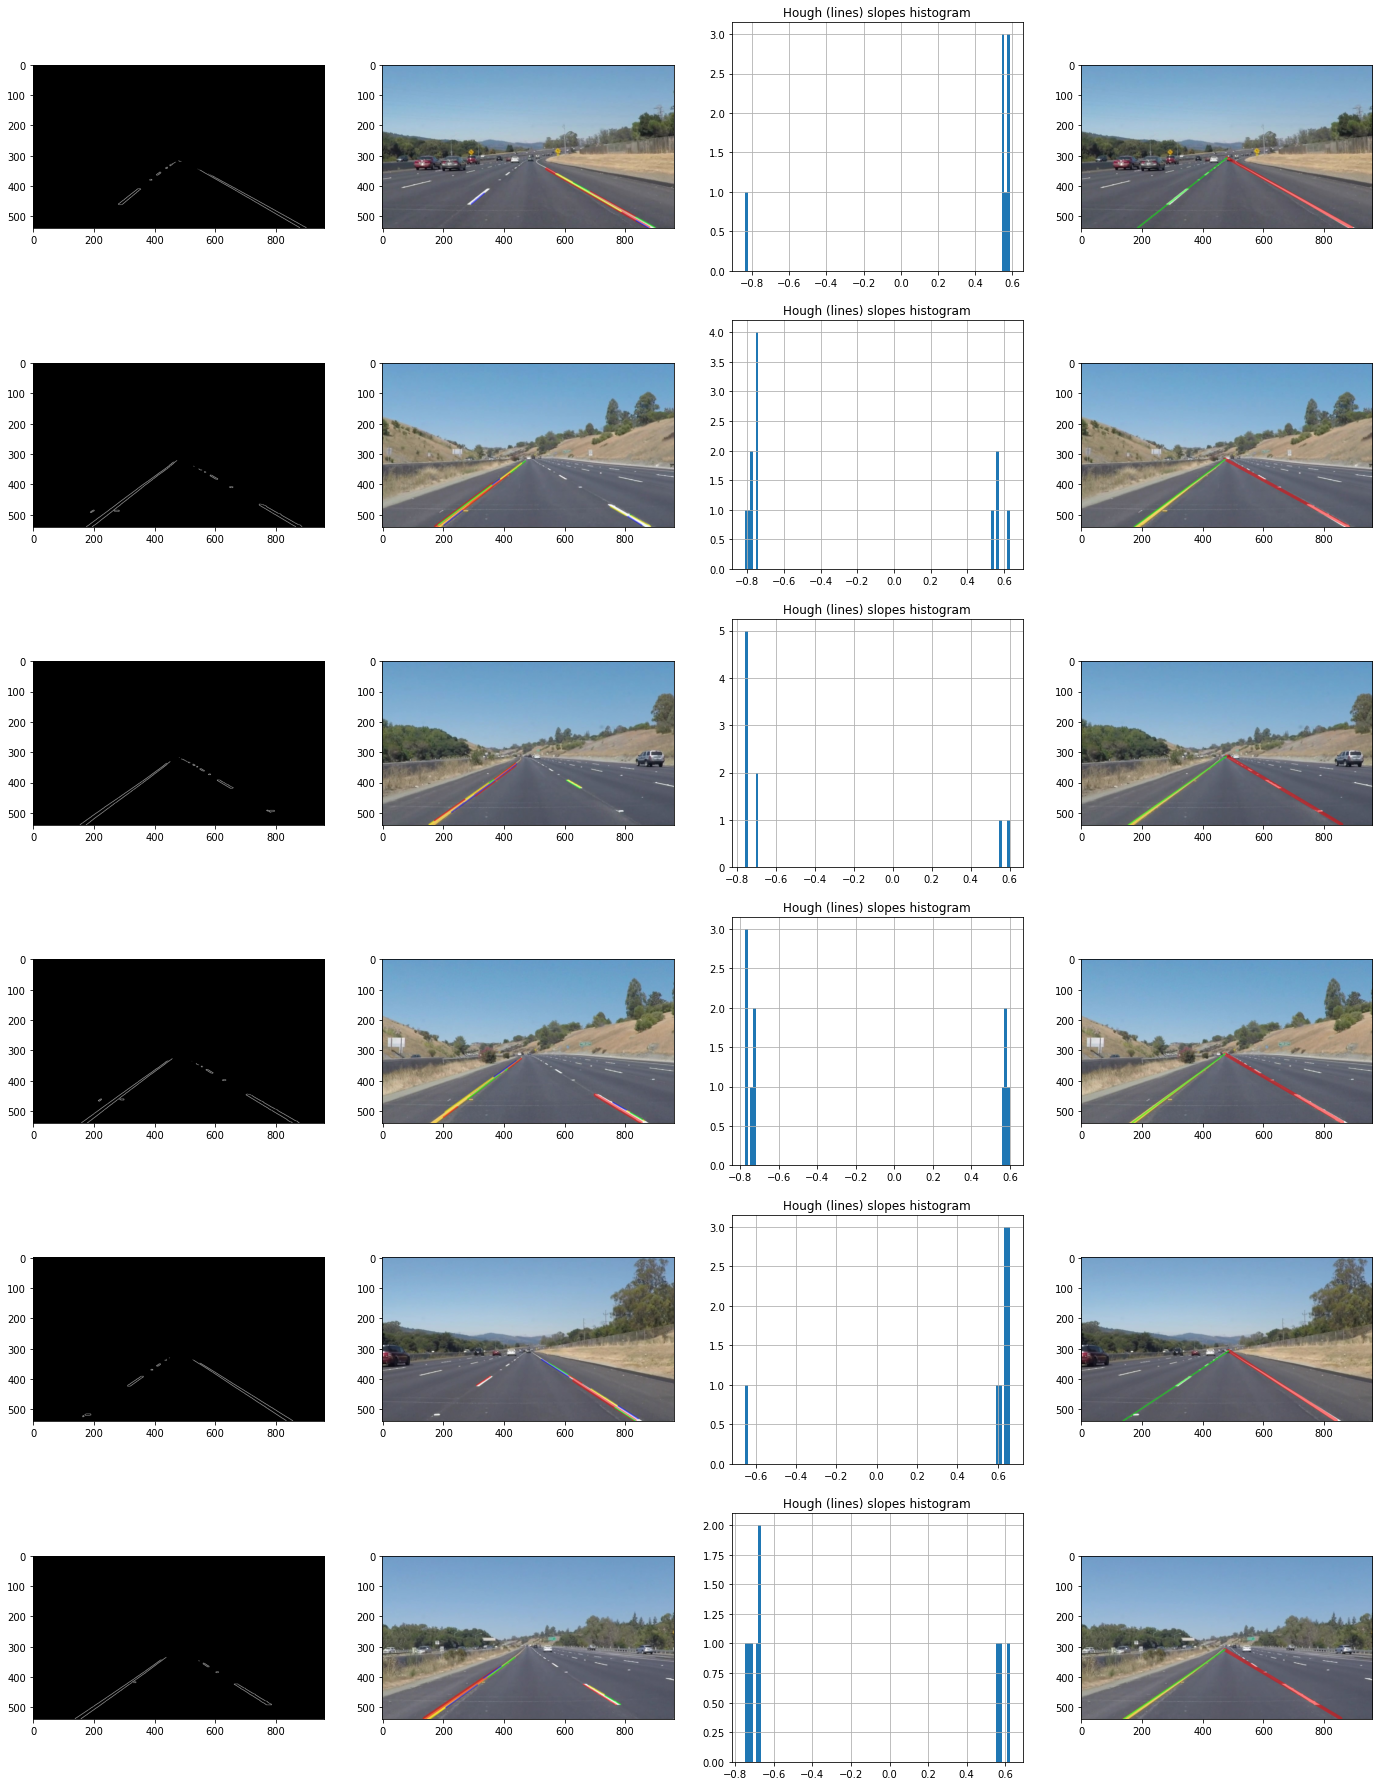

In [35]:
# Visualize steps output
index = 1
plt.figure(figsize=(len(lanes)*4, 4 * 8))
for image_path, lane_segments in  lanes.items():
    # Visualize the line detection and agglomerated  detection for each image
    
    ax_canny_output = plt.subplot(len(lanes), 4, index) # Canny edge detection output
    ax_hough_output = plt.subplot(len(lanes), 4, index+1) # hough output subplot
    ax_slope_hist = plt.subplot(len(lanes), 4, index+2) # hitogram of (lines/segments) slopes
    ax_segments_merging = plt.subplot(len(lanes), 4, index+3) # Segment merging output

    canny_output = interest_region_crop(horizon_crop(canny(gaussian_blur(grayscale(mpimg.imread(image_path))))))
    detected_segments = [Segment(item) for item in np.squeeze(HoughLines(min_line_length=40)(canny_output))]
    ax_canny_output.imshow(canny_output, cmap='gray')
    
    # Visualize original line detection output (segments)
    visualize_segments([([segment],  colors[index%len(colors)]) for index, segment in enumerate(detected_segments)], image_path, ax_hough_output)

    slopes_data = [segment.slope for segment in filter(lambda s: not s.horizontal , detected_segments)]
    ax_slope_hist.hist(slopes_data, bins=100)
    ax_slope_hist.grid()
    ax_slope_hist.set_title("Hough (lines) slopes histogram")
    
    visualize_segments([([segment],  colors[index%len(colors)]) for index, segment in enumerate([lane_segments.get(side, None) for side in ["right", "left"]])], image_path, ax_segments_merging)
    index += 4


In [36]:
# Build a pipeline that will draw lane lines on the test_images
# then save them to the test_images_output directory.

from lane_detection.utils import extract_lane
from lane_detection.visu_utils import draw_lines, draw_lane

output_directory = "./test_images_output"
# Ensure output_directory is created
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
else:
    if not os.path.isdir(output_directory):
        raise Exception(f"{output_directory} exists and is not a directory")

for image_path in test_images:
    image_output_path = os.sep.join([output_directory, os.path.split(image_path)[-1]])
    image = mpimg.imread(image_path)
    draw_lane(image, extract_lane(image), image_output_path)


## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an import error when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel). Still have problems? Try relaunching Jupyter Notebook from the terminal prompt. Also, consult the forums for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://discussions.udacity.com/t/project-error-of-test-on-videos/274082) for more troubleshooting tips across operating systems.**

In [37]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [38]:
prior = None
def process_image(image):
    # return the final output (image where lines are drawn on lanes)
    # edges_image = interest_region_crop(horizon_crop(canny(gaussian_blur(hsv_value(image)))))
    # return draw_lane(np.stack((edges_image,)*3, axis=-1), extract_lane(image))
    global prior
    output = extract_lane(image, prior=prior)
    prior = output
    return draw_lane(image, output)

Let's try the one with the solid white lane on the right first ...

In [39]:
prior = None
white_output = 'test_videos_output/solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

t:   7%|▋         | 15/221 [00:00<00:01, 147.52it/s, now=None]Moviepy - Building video test_videos_output/solidWhiteRight.mp4.
Moviepy - Writing video test_videos_output/solidWhiteRight.mp4

Moviepy - Done !
Moviepy - video ready test_videos_output/solidWhiteRight.mp4
CPU times: user 3.05 s, sys: 2.01 s, total: 5.06 s
Wall time: 2.05 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [40]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [41]:
prior = None
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_
# second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

t:   0%|          | 0/681 [00:00<?, ?it/s, now=None]Moviepy - Building video test_videos_output/solidYellowLeft.mp4.
Moviepy - Writing video test_videos_output/solidYellowLeft.mp4

Moviepy - Done !
Moviepy - video ready test_videos_output/solidYellowLeft.mp4
CPU times: user 9.04 s, sys: 6.09 s, total: 15.1 s
Wall time: 5.54 s


In [42]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [43]:
prior = None

In [44]:
challenge_output = 'test_videos_output/challenge.mp4'

## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
prior = None # re-init the prior
clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(3,7)
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

t:   6%|▌         | 6/100 [00:00<00:01, 59.27it/s, now=None]Moviepy - Building video test_videos_output/challenge.mp4.
Moviepy - Writing video test_videos_output/challenge.mp4

Moviepy - Done !
Moviepy - video ready test_videos_output/challenge.mp4
CPU times: user 2.4 s, sys: 1.35 s, total: 3.75 s
Wall time: 1.98 s


In [45]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))